Clasificar piezas industriales
✨ Contexto:

Eres parte del equipo de visión por computador de una fábrica que produce piezas metálicas de precisión.

Cada pieza fabricada se analiza por una cámara de inspección que extrae 4 métricas clave:

Textura (entre 0 y 1): mide la homogeneidad superficial.

Simetría (entre 0 y 1): cuán simétrica es la pieza en sus formas.

Bordes detectados (valor entero): cantidad de bordes identificados en la imagen (representa rugosidad o detalles).

Desviación del centro (offset): qué tan descentrada está la pieza respecto al ideal (valor positivo, suele ir de 0 a 0.5).

Con estos datos, tu tarea es entrenar un modelo de clasificación basado en Máquinas de Vectores de Soporte (SVM) para identificar automáticamente si una pieza es “Correcta” o “Defectuosa”.



🧪 Reglas de clasificación (para generar los datos):

Al generar tus datos, considera lo siguiente:

Si una pieza tiene simetría < 0.4 y un offset > 0.25, es defectuosa.

Si tiene textura < 0.35, o bordes < 30, o offset > 0.35, también es defectuosa.

El resto de piezas se consideran correctas.



🛠️ Tu objetivo:

Simula un dataset de 400 piezas usando NumPy, con los siguientes parámetros:

Textura: media 0.5, desviación 0.15

Simetría: media 0.6, desviación 0.2

Bordes: media 50, desviación 15

Offset: media 0, desviación 0.2 (usa np.abs() para obtener valores positivos)

Crea una clase Piece que almacene los valores y convierta una pieza a un vector de entrada.

Implementa una clase PieceDatasetGenerator que genere automáticamente los datos y etiquetas según las reglas.

Crea una clase PieceClassifier que:

Entrene un modelo SVC con kernel 'rbf'

Permita hacer predicciones sobre nuevas piezas

Evalúe el modelo con confusion_matrix y classification_report

Divide el dataset en entrenamiento (70%) y prueba (30%) con train_test_split.

Prueba el modelo con una pieza personalizada:

textura = 0.45
simetría = 0.5
bordes = 45
offset = 0.15
Visualiza los resultados con matplotlib, graficando las piezas según:

Eje X: textura

Eje Y: offset

Color según su etiqueta (“Correcta” o “Defectuosa”)



🎯 Ejemplo de uso

example = PieceAnalysisExample()
example.run()


Salida esperada

📊 Matriz de confusión:
[[87  0]
 [28  5]]
 
📝 Informe de clasificación:
              precision    recall  f1-score   support
 
    Correcta       0.76      1.00      0.86        87
  Defectuosa       1.00      0.15      0.26        33
 
    accuracy                           0.77       120
   macro avg       0.88      0.58      0.56       120
weighted avg       0.82      0.77      0.70       120
 
 
🔎 Predicción de pieza personalizada:
  → Textura: 0.45, Simetría: 0.50, Bordes: 45, Offset: 0.15
  → Clasificación: Correcta





🔧 Generando dataset de piezas...
✅ Dataset generado con 400 piezas.

🔄 Dividiendo datos en entrenamiento y prueba...
📦 Entrenamiento: 280 piezas | Prueba: 120 piezas

🤖 Entrenando modelo SVM...
✅ Modelo entrenado correctamente.

🔍 Evaluando modelo...

📊 RESULTADOS DEL MODELO
🧩 Matriz de Confusión:
[[32  6]
 [ 3 79]]

📋 Informe de Clasificación:
              precision    recall  f1-score   support

    Correcta       0.91      0.84      0.88        38
  Defectuosa       0.93      0.96      0.95        82

    accuracy                           0.93       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.93      0.92       120


🧪 Predicción de nueva pieza:
🔎 Características de la pieza a analizar:
🧶 Textura        : 0.45
📐 Simetría      : 0.50
✂️  Bordes        : 45
🎯 Desviación C.M: 0.15

📌 Clasificación : ❌ DEFECTUOSA

📈 Visualizando resultados...


C:\Users\Acer\AppData\Local\Temp\ipykernel_70240\1027326225.py:132: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


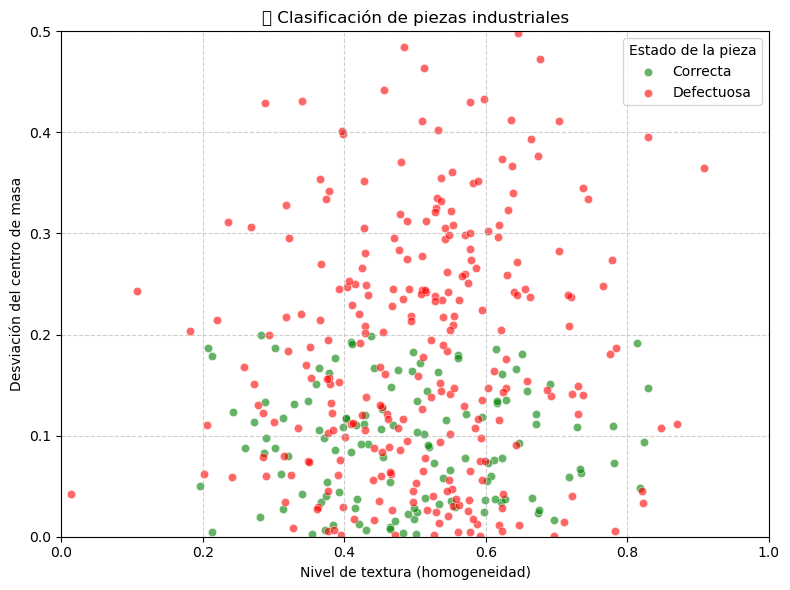

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# --- Clase Piece ---
class Piece:
    def __init__(self, texture, symmetry, edges, center_offset, label):
        self.texture = texture
        self.symmetry = symmetry
        self.edges = edges
        self.center_offset = center_offset
        self.label = label

    def to_vector(self):
        return [self.texture, self.symmetry, self.edges, self.center_offset]

    def __repr__(self):
        return f"Piece(texture={self.texture:.2f}, symmetry={self.symmetry:.2f}, edges={self.edges}, center_offset={self.center_offset:.2f}, label='{self.label}')"

# --- Clase PieceDatasetGenerator ---
class PieceDatasetGenerator:
    def __init__(self, n=400):
        self.n = n

    def generate(self):
        np.random.seed(42)
        textures = np.random.normal(0.5, 0.15, size=self.n)
        symmetries = np.random.normal(0.6, 0.2, size=self.n)
        edges = np.clip(np.random.normal(50, 15, size=self.n), 0, None).astype(int)
        offsets = np.abs(np.random.normal(0, 0.2, size=self.n))

        data = []
        for t, s, e, o in zip(textures, symmetries, edges, offsets):
            label = "Correcta" if s > 0.5 and e < 60 and o < 0.2 else "Defectuosa"
            data.append(Piece(t, s, e, o, label))
        return data

# --- Clase PieceClassifier ---
class PieceClassifier:
    def __init__(self):
        self.model = SVC(kernel='rbf')
        self.scaler = StandardScaler()

    def fit(self, pieces):
        X = np.array([p.to_vector() for p in pieces])
        y = np.array([p.label for p in pieces])
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)

    def predict(self, texture, symmetry, edges, offset):
        X_scaled = self.scaler.transform([[texture, symmetry, edges, offset]])
        return self.model.predict(X_scaled)[0]

    def evaluate(self, test_data):
        X_test = np.array([p.to_vector() for p in test_data])
        y_test = np.array([p.label for p in test_data])
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)

        print("\n📊 RESULTADOS DEL MODELO")
        print("=" * 40)
        print("🧩 Matriz de Confusión:")
        print(confusion_matrix(y_test, y_pred))
        print("\n📋 Informe de Clasificación:")
        print(classification_report(y_test, y_pred))
        print("=" * 40)

# --- Clase PieceAnalysisExample ---
class PieceAnalysisExample:
    def run(self):
        print("\n🔧 Generando dataset de piezas...")
        generator = PieceDatasetGenerator(n=400)
        pieces = generator.generate()
        print(f"✅ Dataset generado con {len(pieces)} piezas.")

        print("\n🔄 Dividiendo datos en entrenamiento y prueba...")
        labels = [p.label for p in pieces]
        if len(set(labels)) < 2 or min([labels.count(l) for l in set(labels)]) < 2:
            print("⚠️ Advertencia: No se puede estratificar. División no estratificada.")
            train, test = train_test_split(pieces, test_size=0.3, random_state=42)
        else:
            train, test = train_test_split(pieces, test_size=0.3, random_state=42, stratify=labels)

        print(f"📦 Entrenamiento: {len(train)} piezas | Prueba: {len(test)} piezas")

        print("\n🤖 Entrenando modelo SVM...")
        classifier = PieceClassifier()
        classifier.fit(train)
        print("✅ Modelo entrenado correctamente.")

        print("\n🔍 Evaluando modelo...")
        classifier.evaluate(test)

        print("\n🧪 Predicción de nueva pieza:")
        sample_attrs = (0.45, 0.5, 45, 0.15)
        prediction = classifier.predict(*sample_attrs)

        print("=" * 40)
        print("🔎 Características de la pieza a analizar:")
        print(f"🧶 Textura        : {sample_attrs[0]:.2f}")
        print(f"📐 Simetría      : {sample_attrs[1]:.2f}")
        print(f"✂️  Bordes        : {sample_attrs[2]}")
        print(f"🎯 Desviación C.M: {sample_attrs[3]:.2f}")
        print(f"\n📌 Clasificación : {'✅ CORRECTA' if prediction == 'Correcta' else '❌ DEFECTUOSA'}")
        print("=" * 40)

        print("\n📈 Visualizando resultados...")
        df = pd.DataFrame({
            "Textura": [p.texture for p in pieces],
            "Simetría": [p.symmetry for p in pieces],
            "Bordes": [p.edges for p in pieces],
            "Offset": [p.center_offset for p in pieces],
            "Etiqueta": [p.label for p in pieces]
        })

        colores = {"Correcta": "green", "Defectuosa": "red"}
        plt.figure(figsize=(8,6))
        for label, color in colores.items():
            subset = df[df["Etiqueta"] == label]
            plt.scatter(subset["Textura"], subset["Offset"], label=label, c=color, alpha=0.6, edgecolors='w', linewidth=0.5)
        plt.xlabel("Nivel de textura (homogeneidad)")
        plt.ylabel("Desviación del centro de masa")
        plt.title("🔬 Clasificación de piezas industriales")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend(title="Estado de la pieza")
        plt.xlim(0, 1)
        plt.ylim(0, 0.5)
        plt.tight_layout()
        plt.show()

# Ejecutar el análisis
if __name__ == "__main__":
    example = PieceAnalysisExample()
    example.run()
